In [6]:
# Load model from Hugging Face
from ultralytics import YOLO
from huggingface_hub import hf_hub_download
import os

MODEL_PATH = hf_hub_download(
    repo_id="QuincySorrentino/AeroYOLO",
    filename="best.pt"
)

# Load the YOLO model
model = YOLO(MODEL_PATH)
print(f"Model loaded from: {MODEL_PATH}")

Model loaded from: C:\Users\qwsor\.cache\huggingface\hub\models--QuincySorrentino--AeroYOLO\snapshots\67e0fb4799f24c7972a6de24f1d3f7cfdc2b48c7\best.pt



image 1/1 c:\Users\qwsor\OneDrive\Desktop\Aircraft_Detect\test_images\airplane.jpg: 640x640 1 aircraft, 242.3ms
Speed: 11.7ms preprocess, 242.3ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\qwsor\OneDrive\Desktop\Aircraft_Detect\runs\detect\inference6

Detections: 1 objects found
Results saved to: runs/detect/inference/


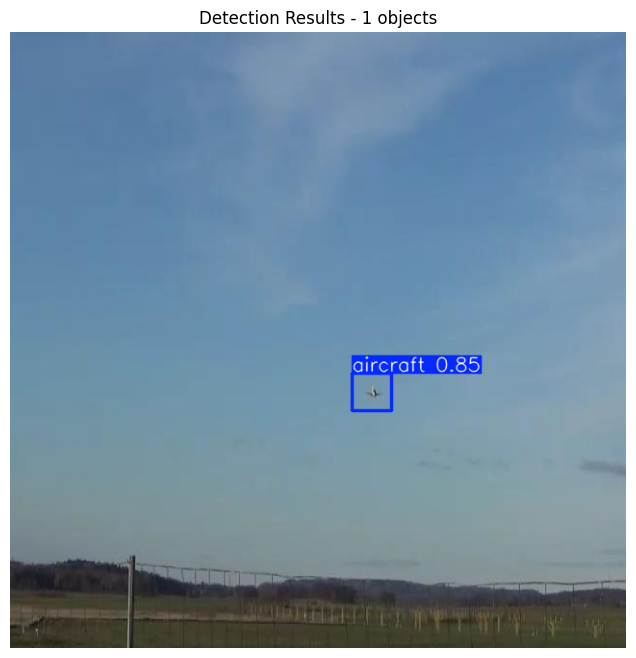


Detection Details:
  1. aircraft: 84.55% confidence
      Bounding box: [355, 354, 396, 393]


In [18]:
# Run inference on a single image
from PIL import Image
import matplotlib.pyplot as plt

# Enter your image path here
IMAGE_PATH = "test_images/airplane.jpg"

# Run inference (YOLO automatically resizes to 640x640)
results = model.predict(
    IMAGE_PATH,
    conf=0.25,      # Confidence threshold
    iou=0.45,       # NMS IoU threshold
    imgsz=640,      # Model input size (auto-resized from any original size)
    save=True,      # Save annotated image
    project='runs/detect',
    name='inference',
    verbose=True
)

# Display results
result = results[0]
print(f"\nDetections: {len(result.boxes)} objects found")
print(f"Results saved to: runs/detect/inference/")

# Show annotated image
annotated = result.plot()
plt.figure(figsize=(12, 8))
plt.imshow(annotated[..., ::-1])  # BGR to RGB
plt.axis('off')
plt.title(f'Detection Results - {len(result.boxes)} objects')
plt.show()

# Print detection details
print(f"\nDetection Details:")
for i, box in enumerate(result.boxes):
    cls = int(box.cls[0])
    conf = float(box.conf[0])
    coords = box.xyxy[0].tolist()
    print(f"  {i+1}. {result.names[cls]}: {conf:.2%} confidence")
    print(f"      Bounding box: {[int(x) for x in coords]}")

In [ ]:
# Results location
print(f"Results saved locally at: {os.path.abspath('runs/detect/inference/')}")